# GLS Trial

Pe = 10.0


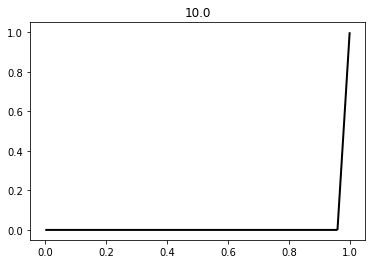

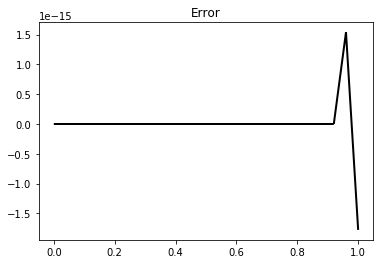

In [9]:
from firedrake import *
import matplotlib.pyplot as plt
#from sympy.mpmath import *


N = 25
mesh = UnitIntervalMesh(N)

e = 1  # diffusion constant 
b = 500  # convection constant

V = FunctionSpace(mesh, 'CG', 1)
u = TrialFunction(V)
v = TestFunction(V)


x = SpatialCoordinate(mesh)[0]

f = Function(V)
f = Constant(0)


boundary_ids1 = {1} # boundaries x=0 
boundary_ids2 = {2} # boundaries x=1 

bc1 = DirichletBC(V,0,boundary_ids1) # Boundary conditions for x=0
bc2 = DirichletBC(V,1,boundary_ids2) # Boundary conditions for x=1

h = 1/N
pe = b/(2*e*N)
#dell =0.001 
dell = (h/(2*b))*( ((exp(2*pe)+1)/(exp(2*pe)-1)) - 1/pe)

uh = Function(V)
L = f*v*dx
a = ( e * dot(grad(v),grad(u)) ) * dx + ( b * u.dx(0) * v * dx) + dell * dot(b*grad(v),b*grad(u)) * dx

solve(a == L, uh, bcs=[bc1,bc2])

print ('Pe =',pe)
plot(uh)
plt.title(pe) 

u_exact = Function(V)
u_exact = (exp(b*x/e)-1)/(exp(b/e)-1)
difference = assemble(interpolate(u_exact, V) - uh)
plot(difference)
plt.title('Error') 
plt.show()

Pe = 10.0


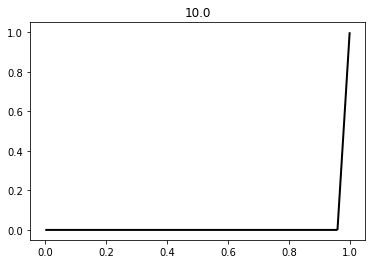

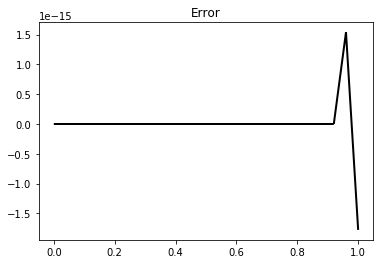

In [28]:
from firedrake import *
import matplotlib.pyplot as plt
#from sympy.mpmath import *


N = 25
mesh = UnitIntervalMesh(N)

e = 1  # diffusion constant

b = 500  # convection constant


V = FunctionSpace(mesh, 'CG', 1)
u = TrialFunction(V)
v = TestFunction(V)


x = SpatialCoordinate(mesh)[0]

f = Function(V)
f = Constant(0)


boundary_ids1 = {1} # boundaries x=0 
boundary_ids2 = {2} # boundaries x=1 

bc1 = DirichletBC(V,0,boundary_ids1) # Boundary conditions for x=0
bc2 = DirichletBC(V,1,boundary_ids2) # Boundary conditions for x=1

h = 1/N
pe = b/(2*e*N)
#dell =0.001 
dell = (h/(2*b))*( ((exp(2*pe)+1)/(exp(2*pe)-1)) - 1/pe)

uh = Function(V)
L = f*v*dx
a = ( e * dot(grad(v),grad(u)) ) * dx + ( b * u.dx(0) * v * dx) + dell * dot(b*grad(v),b*grad(u)) * dx

solve(a == L, uh, bcs=[bc1,bc2])

print ('Pe =',pe)
plot(uh)
plt.title(pe) 

u_exact = Function(V)
u_exact = (exp(b*x/e)-1)/(exp(b/e)-1)
difference = assemble(interpolate(u_exact, V) - uh)
plot(difference)
plt.title('Error') 
plt.show()